In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
yelp=pd.read_csv('yelp.csv')

In [3]:
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 546.9+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
yelp['text length']=yelp['text'].apply(len)

In [7]:
import seaborn as sns

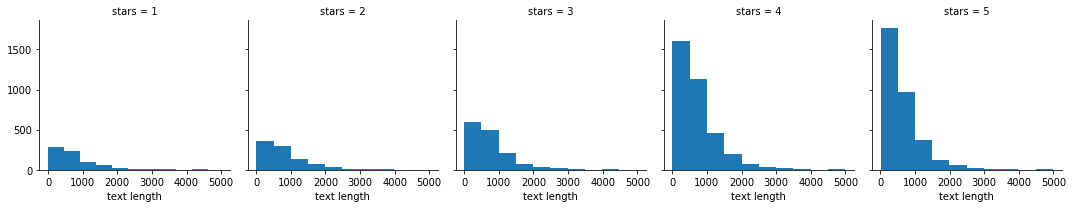

In [11]:
g=sns.FacetGrid(yelp, col='stars')
g.map(plt.hist, 'text length')

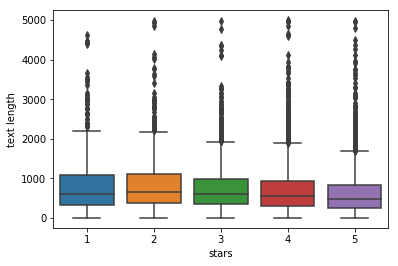

In [15]:
sns.boxplot(x='stars',y='text length',data=yelp)

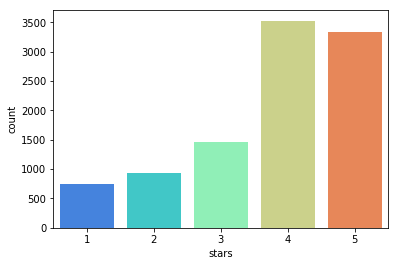

In [17]:
sns.countplot(yelp['stars'],palette='rainbow')

In [22]:
star=yelp.groupby('stars').mean()

In [23]:
star.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


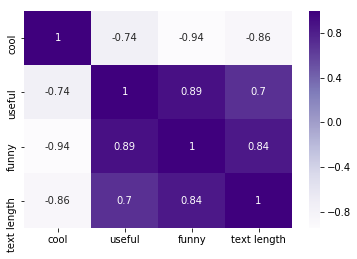

In [31]:
sns.heatmap(star.corr(),cmap='Purples',annot=True)

# NLP Classification Task

In [57]:
yelp_class=yelp[(yelp['stars']==1) | (yelp['stars']==5)]

In [60]:
yelp_class.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889


In [61]:
X=yelp_class['text']

In [62]:
y=yelp_class['stars']

In [63]:
X.shape

(4086,)

In [64]:
y.shape

(4086,)

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [66]:
X=cv.fit_transform(X)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [69]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [70]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [71]:
predictions=nb.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix,classification_report

In [74]:
print(confusion_matrix(y_test,predictions))
print()
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]

             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



# Using Text Processing

In [75]:
from sklearn.feature_extraction.text import TfidfTransformer

In [76]:
from sklearn.pipeline import Pipeline

In [79]:
pipeline=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [80]:
X=yelp_class['text']
y=yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [81]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [83]:
predictions=pipeline.predict(X_test)

In [85]:
print(confusion_matrix(y_test,predictions))
print()
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]

             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



c:\users\admin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
